# Week1: Python Basics: Python 基础



### 安装环境：numpy, scipy, spectral, matplotlib, torch, scikit-learn

In [1]:
# Week 1: Environment check (运行环境检查)
import sys
print('Python', sys.version)
import torch
print('PyTorch', torch.__version__)

Python 3.9.18 | packaged by conda-forge | (main, Dec 23 2023, 16:35:41) 
[Clang 16.0.6 ]
PyTorch 2.8.0


In [2]:
# Week 2 example: numpy array operations (NumPy 操作示例)
import numpy as np
arr = np.arange(12).reshape(3,4)
print(arr)
print('mean=', np.mean(arr))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
mean= 5.5


In [3]:
# Week 3 example: pandas read/write (Pandas 示例)
import pandas as pd
df = pd.DataFrame({'a':[1,2,3],'b':[4,5,6]})
df.to_csv('sample.csv', index=False)
print(df.head())

   a  b
0  1  4
1  2  5
2  3  6


In [4]:
# Week 4 example exercise
# Implement a simple function and test it

def multiply(x, y):
    """Multiply two numbers / 相乘函数"""
    return x * y

print(multiply(6,7))

42


### 下载 Indian Pines数据集

下载命令

```kaggle datasets download abhijeetgo/indian-pines-hyperspectral-dataset -p data/```

解压后可以使用

#### Load Indian Pines dataset (加载 Indian Pines 数据集)


In [9]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load('../../data/indian-pines-hyperspectral-dataset/indianpinearray.npy')

print(data.shape)
print(data.dtype)
print(data[0][0])

(145, 145, 200)
uint16
[3172 4142 4506 4279 4782 5048 5213 5106 5053 4750 4816 4769 4610 4805
 4828 4861 4767 4624 4549 4463 4462 4446 4445 4336 4381 4319 4207 4305
 4311 3991 4168 3942 4061 4362 4318 4252 4869 5284 5055 3591 5175 5217
 5058 4969 4721 4291 4555 4886 4868 4806 4783 4811 4709 3903 3795 3715
 2591 2130 2269 2480 3145 3626 4060 4296 4211 4225 4157 4133 4082 4048
 3935 3843 3784 3642 3271 2707 1707 1564 1838 1719 2229 2764 2919 2873
 2977 2913 3034 3051 3124 3101 3033 2713 2740 2947 2706 2834 2856 2683
 2400 2229 1822 1542 1097 1047 1069 1100 1122 1259 1365 1261 1374 1630
 1851 2028 2130 2170 2205 2214 2204 2100 2106 2146 2089 2078 2134 2127
 2074 2057 2045 2003 1999 1959 1924 1883 1843 1781 1716 1698 1645 1540
 1410 1294 1131 1044 1032 1045 1100 1212 1295 1244 1100 1103 1216 1346
 1330 1259 1251 1313 1372 1393 1402 1396 1381 1396 1381 1353 1346 1341
 1332 1324 1310 1318 1330 1310 1292 1280 1275 1266 1264 1233 1241 1232
 1215 1215 1187 1168 1171 1150 1134 1123 1135 1094 109

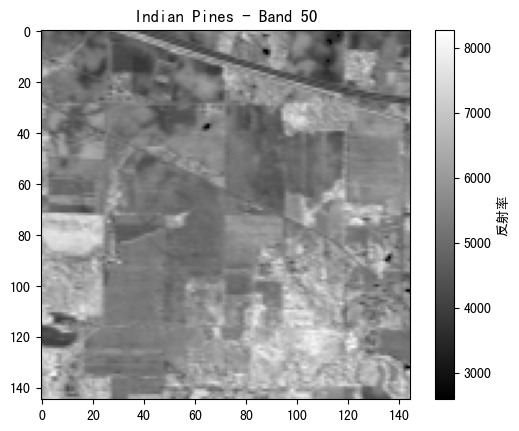

[[4783 5254 5342 ... 3987 4049 4262]
 [4630 5111 5281 ... 4505 4465 4601]
 [4563 5010 5191 ... 4346 4229 4195]
 ...
 [6151 6350 6855 ... 6625 6183 6301]
 [6346 6576 6883 ... 6291 6301 6882]
 [6437 6933 7033 ... 6647 6310 6417]]


In [14]:
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

plt.imshow(data[:, :, 50], cmap='gray')
plt.colorbar(label='反射率')
plt.title(f'Indian Pines - Band {50}')
plt.show()

print(data[:, :, 50])

float32


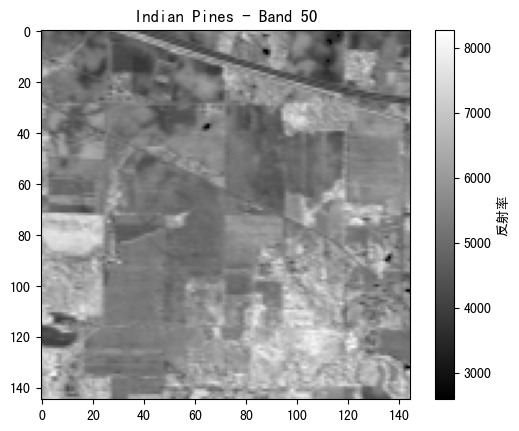

In [22]:
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
float_data = data.astype('float32')
print(float_data[:, :, 50].dtype)
plt.imshow(float_data[:, :, 50],  cmap='gray',)
plt.colorbar(label='反射率')
plt.title(f'Indian Pines - Band {50}')
plt.show()


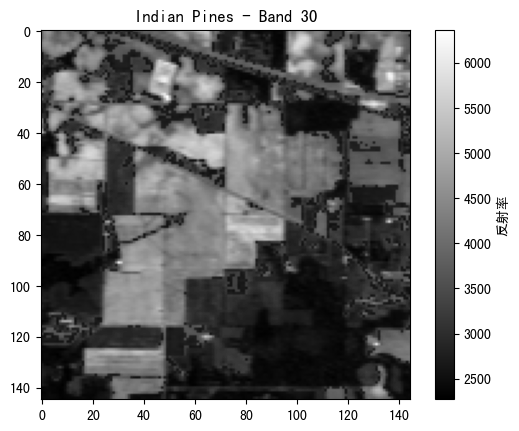

In [23]:
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

plt.imshow(data[:, :, 30], cmap='gray')
plt.colorbar(label='反射率')
plt.title(f'Indian Pines - Band {30}')
plt.show()

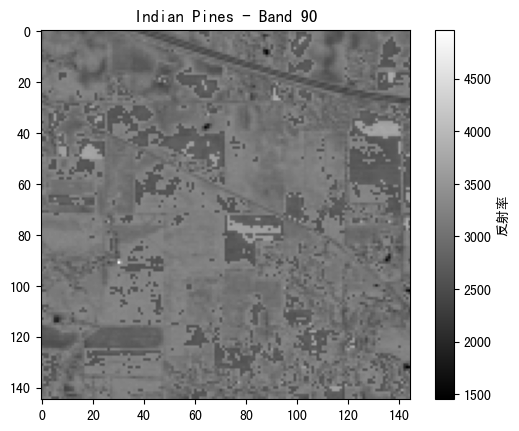

In [24]:
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

plt.imshow(data[:, :, 90], cmap='gray')
plt.colorbar(label='反射率')
plt.title(f'Indian Pines - Band {90}')
plt.show()

#### 缺漏知识补充

In [13]:
# numpy array indexing (NumPy 数组索引)
test_data = np.array([[1, 2, 3], [4, 5, 6]])
print(test_data[:, 1])  # 取第二列

[2 5]


**plt.imshow**
plt.imshow() 不会自动进行全局归一化，但其内部存在线性映射机制，会根据数据范围或用户指定的参数将原始值映射到显示设备的像素值范围（如0-255或0-1）
映射公式为：
$$ display\_value = \frac{data\_value-data\_min}{data\_max-data\_min} \times (display\_max-display\_min)+display\_min $$
如：数据范围 [261, 2582] → 显示范围 [0, 255]
- 最小值映射：
    $$ 261 \to \frac{261-261}{2582-261} \times (255-0)+0 = 0(黑) $$
- 最大值映射：
    $$ 2582 \to \frac{2582-261}{2582-261} \times (255-0)+0 = 255(白) $$